In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
df = pd.read_csv(url)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [3]:
df = df.drop('duration', axis=1)

In [4]:
# PRIMO MODELLO VARIABILI SCELTE: JOB, DEFAULT, EURIBOR3M, PDAYS
df1 = df.copy()
df1['default'] = df1['default'].map({
    'no': 0,
    'yes': 1,
    'unknown': -1
})

job_map = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 2,
    'housemaid': 3,
    'management': 4,
    'retired': 5,
    'self-employed': 6,
    'services': 7,
    'student': 8,
    'technician': 9,
    'unemployed': 10,
    'unknown': 11
}
df1['job'] = df1['job'].map(job_map)
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,married,basic.4y,-1,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,married,unknown,0,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,single,university.degree,0,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,married,high.school,0,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,married,basic.4y,0,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,married,high.school,-1,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,married,basic.4y,-1,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,single,university.degree,-1,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,married,professional.course,0,no,yes,telephone,oct,tue,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [5]:
X = df1[['job','default', 'pdays', 'euribor3m']]
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
model = LogisticRegression(solver='liblinear', C=5.0)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,5.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_prop = model.predict_proba(X_test)
y_pred = model.predict(X_test)
score_ = model.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [8]:
# print('X:', X, sep='\n')
# print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
# print('y_prob:', y_prop, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

intercept: [0.95106265]
coef: [[ 0.01014108  0.47627147 -0.00185904 -0.4249821 ]]

score_: 0.8955035447217636

conf_m:
[[8992  126]
 [ 950  229]]

report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9118
           1       0.65      0.19      0.30      1179

    accuracy                           0.90     10297
   macro avg       0.77      0.59      0.62     10297
weighted avg       0.87      0.90      0.87     10297



In [9]:
var = classification_report(model.predict(X_test),y_test)
conf = confusion_matrix(model.predict(X_test),y_test)

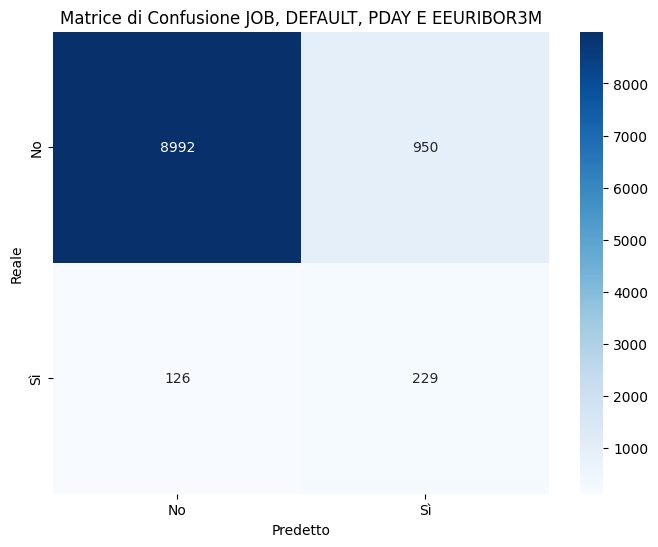

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sì"], yticklabels=["No", "Sì"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione JOB, DEFAULT, PDAY E EEURIBOR3M")
plt.show()

In [11]:
#SECONDO MODELLO VARIABILI SCELTE: tutte
df2 = df.copy()
education_map = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}

job_map = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 2,
    'housemaid': 3,
    'management': 4,
    'retired': 5,
    'self-employed': 6,
    'services': 7,
    'student': 8,
    'technician': 9,
    'unemployed': 10,
    'unknown': 11
}

marital_map = {
    'single': 0,
    'married': 1,
    'divorced': 2,
    'unknown': 3 
}

df2['default'] = df2['default'].map({
    'no': 0,
    'yes': 1,
    'unknown': 2
})

housing_map = {
    'no': 0,
    'yes': 1,
    'unknown': -1
}

loan_map = {
    'no': 0,
    'yes': 1,
    'unknown': -1
}

contact_map = {
    'telephone': 0,
    'cellular': 1
}

month_map = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

day_map = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

poutcome_map = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}




df2['education'] = df2['education'].map(education_map)
df2['job'] = df2['job'].map(job_map)
df2['marital'] = df2['marital'].map(marital_map)
df2['housing'] = df2['housing'].map(housing_map)
df2['loan'] = df2['loan'].map(loan_map)
df2['contact'] = df2['contact'].map(contact_map)
df2['month'] = df2['month'].map(month_map)
df2['day_of_week'] = df2['day_of_week'].map(day_map)
df2['poutcome'] = df2['poutcome'].map(poutcome_map)
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,1,2,1,0,1,8,3,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,1,11,4,1,999,0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,0,6,0,1,0,1,6,3,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,4,0,0,0,1,4,4,2,999,0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,1,0,1,0,1,8,4,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,4,2,0,1,0,6,3,1,999,0,0,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,1,2,0,0,0,5,3,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,0,6,2,1,1,0,5,2,3,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,0,1,0,10,1,2,999,0,0,-3.4,92.431,-26.9,0.742,5017.5,0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  emp_var_rate    41188 non-null  float64
 15  cons_price_idx  41188 non-null  float64
 16  cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [13]:

X2 = df2.drop("y", axis=1)
y2 = df2["y"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

In [14]:
model2 = LogisticRegression(solver='liblinear', C=5.0)
model2.fit(X_train2,y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,5.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_prop2 = model2.predict_proba(X_test2)
y_pred2 = model2.predict(X_test2)
score_2 = model2.score(X_test2, y_test2)
conf_m2 = confusion_matrix(y_test2, y_pred2)
report2= classification_report(y_test2, y_pred2)

In [16]:
# print('X:', X, sep='\n')
# print('y:', y, sep='\n', end='\n\n')
print('intercept:', model2.intercept_)
print('coef:', model2.coef_, end='\n\n')
# print('y_prob:', y_prop, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('score_:', score_2, end='\n\n')
print('conf_m:', conf_m2, sep='\n', end='\n\n')
print('report:', report2, sep='\n')

intercept: [0.00278108]
coef: [[ 0.00704265  0.01123971 -0.06864     0.08516044 -0.10347618 -0.00720302
  -0.0053586   0.11071189  0.01039147  0.05210116 -0.02426489 -0.00171735
  -0.08673482 -0.07842202 -0.13747035  0.33896392  0.03047649 -0.17592551
  -0.00607422]]

score_: 0.8977372050111683

conf_m:
[[9025  110]
 [ 943  219]]

report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9135
           1       0.67      0.19      0.29      1162

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



In [17]:
var2 = classification_report(model2.predict(X_test2),y_test2)
conf2 = confusion_matrix(model2.predict(X_test2),y_test2)

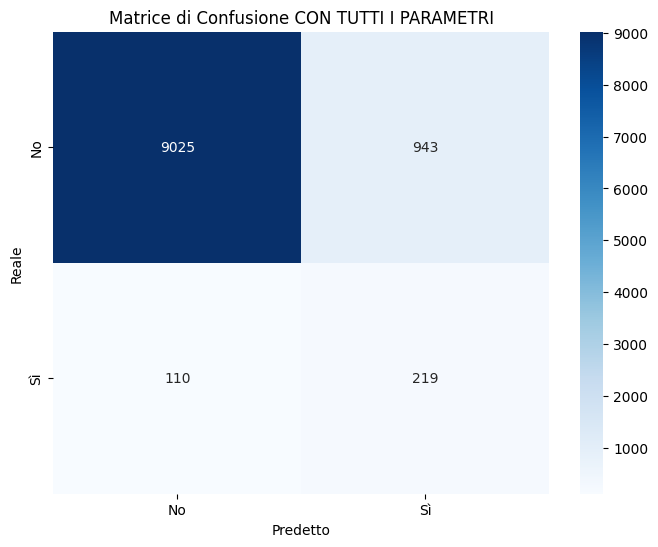

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf2, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sì"], yticklabels=["No", "Sì"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione CON TUTTI I PARAMETRI")
plt.show()

In [19]:
df3 = df.copy()
categorical_cols = df3.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df3[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded, columns=encoded_cols)
df_encoded = pd.concat([df3.drop(columns=categorical_cols).reset_index(drop=True), encoded_df], axis=1)

In [20]:
X3 = df_encoded.drop("y", axis=1)
y3 = df_encoded["y"]

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled,y3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3,y3)

In [21]:
model3 = LogisticRegression(solver='liblinear', C=5.0)
model3.fit(X_train3, y_train3)

model4 = LogisticRegression(solver='liblinear', C=5.0)
model4.fit(X_train4, y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,5.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_prop3 = model3.predict_proba(X_test3)
y_pred3 = model3.predict(X_test3)
score_3 = model3.score(X_test3, y_test3)
conf_m3 = confusion_matrix(y_test3, y_pred3)
report3 = classification_report(y_test3, y_pred3)

y_pred4 = model4.predict(X_test4)
y_prob4 = model4.predict_proba(X_test4)
score_4 = model4.score(X_test4, y_test4)
conf_m4 = confusion_matrix(y_test4, y_pred4)
report4 = classification_report(y_test4, y_pred4)
print("Accuracy:", score_4)
print("Confusion Matrix:\n", conf_m4, "\n\nClassification Report:\n", report4)

Accuracy: 0.9017189472661941
Confusion Matrix:
 [[9020   95]
 [ 917  265]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9115
           1       0.74      0.22      0.34      1182

    accuracy                           0.90     10297
   macro avg       0.82      0.61      0.65     10297
weighted avg       0.89      0.90      0.88     10297



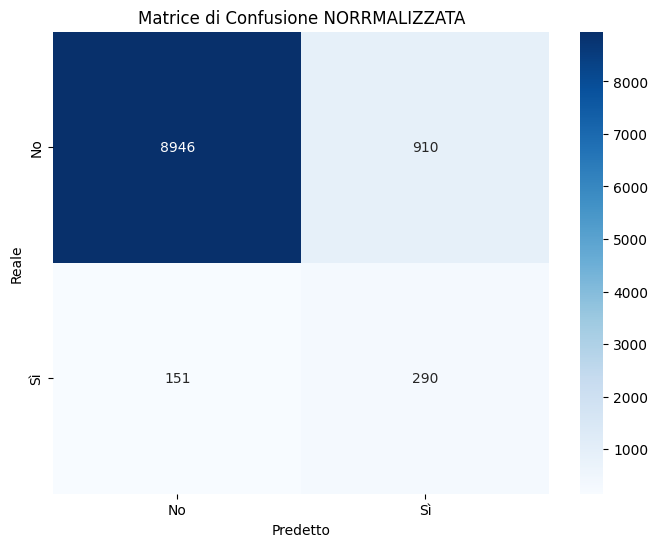

In [31]:
var3 = classification_report(model3.predict(X_test3),y_test3)
conf3 = confusion_matrix(model3.predict(X_test3),y_test3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf3, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sì"], yticklabels=["No", "Sì"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione NORRMALIZZATA")
plt.show()

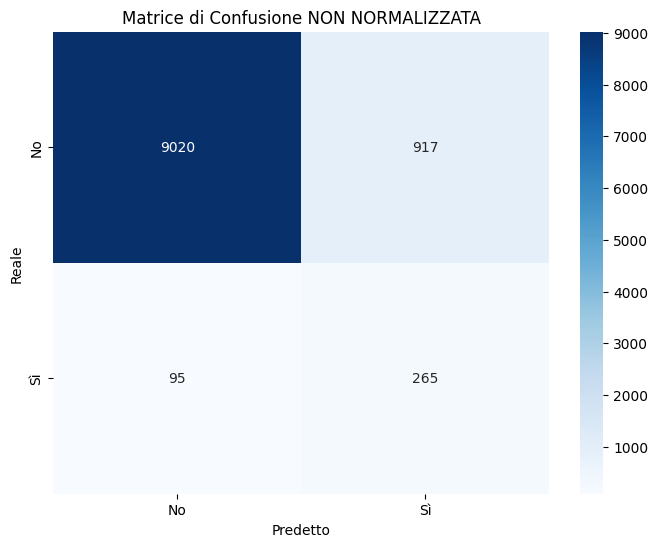

In [29]:
var4 = classification_report(model4.predict(X_test4),y_test4)
conf4 = confusion_matrix(model4.predict(X_test4),y_test4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf4, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sì"], yticklabels=["No", "Sì"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione NON NORMALIZZATA")
plt.show()

In [25]:
# print('X:', X, sep='\n')
# print('y:', y, sep='\n', end='\n\n')
print('intercept:', model3.intercept_)
# print('coef:', model3.coef_, end='\n\n')
# print('y_prob:', y_prop, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('score_:', score_3, end='\n\n')
print('conf_m:', conf_m3, sep='\n', end='\n\n')
print('report:', report3, sep='\n')

intercept: [-2.50234317]
score_: 0.8969602796931145

conf_m:
[[8946  151]
 [ 910  290]]

report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9097
           1       0.66      0.24      0.35      1200

    accuracy                           0.90     10297
   macro avg       0.78      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297



In [28]:
# print('X:', X4, sep='\n')
# print('y:', y4, sep='\n', end='\n\n')
print('intercept:', model4.intercept_)
# print('coef:', model4.coef_, end='\n\n')
# print('y_prob:', y_prob4, sep='\n', end='\n\n')
# print('y_pred:', y_pred4, end='\n\n')
print('score_:', score_4, end='\n\n')
print('conf_m:', conf_m4, sep='\n', end='\n\n')
print('report:', report4, sep='\n')

intercept: [0.00239198]
score_: 0.9017189472661941

conf_m:
[[9020   95]
 [ 917  265]]

report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9115
           1       0.74      0.22      0.34      1182

    accuracy                           0.90     10297
   macro avg       0.82      0.61      0.65     10297
weighted avg       0.89      0.90      0.88     10297

